In [1]:
%%HTML
<div align='right'>
<script>
    code_show=true;
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    }
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
    </div>

# Lightning Data

We have varying amounts of data from the contiguous US from 1991 to 2015. These data are all available through the [THREDDS server](http://hydromet-thredds.princeton.edu:9000/thredds/catalog/data/Cloud_to_Ground_Lightning/catalog.html) but they are a little buried. Their combined size is about 50GB. If you download them locally, then accessing them through in python using xarray is as easy as 

    xr.open_mfdataset('path/to/data/2014_01_*.nc', concat_dim='record')
    
<img src="output/US_1991.png"/>

In [3]:
from __init__ import *
from plotting import *
from region import Region

%matplotlib inline

## Regional Aggregations
I am creating a toolbox with funtions to quickly compute the following:
 - Mean monthly CG flash density for a region; ~ 1km grid
 - Mean monthly diurnal cycle of CG flash density by month for a region
 - Largest 100 CG flash density days (12 UTC - 12 UTC) for a region
 - JJA time (UTC) of maximum CG flash density (15 minute time resolution); ~ 1 km grid
 - “Amplitude” of the diurnal cycle; 15 minute time resolution ~1km grid.  CG flash density at the time of maximum flash density - CG flash density a time of minimum flash density divided by the mean flash density. 
 
## Storm Tracking
For 2D storm tracking I am relying on the r package SpatialVx. 

 - Storm event CG flash density fields at ~.25 km grid resolution and 5 minute time resolution.  2D Gaussian distribution of each CG flash.  
 - Storm tracking for CG flash density fields. 

## Regional Aggregations
I am creating a toolbox with funtions to quickly compute the following:
 - Mean monthly CG flash density for a region; ~5km grid

In [ ]:
for m in [1,2,3,4,5,10,11,12]:
    print m
    ds = c.get_ds(m=m, grid=True)
    c.to_DC_grid(ds)
    ds.close()
    MMDC_grid.update({m: c.DC_grid})
    MMFC_grid.update({m: c.FC_grid})

1
2
3
4


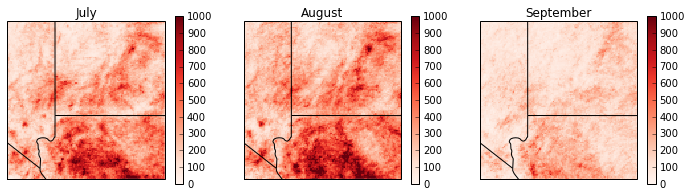

In [10]:
c = Region(city=cities['cedar'])
c.define_grid(nbins=120)

MMDC_grid = {}
MMFC_grid = {}
for m in range(6,10):
    print m
    ds = c.get_ds(m=m, grid=True)
    c.to_DC_grid(ds)
    ds.close()
    MMDC_grid.update({m: c.DC_grid})
    MMFC_grid.update({m: c.FC_grid})
    
plt.figure(figsize=(12, 3))
n=1
for m in [7,8,9]:
    ax = background(plt.subplot(1, 3, n, projection=ccrs.PlateCarree()))
    im, ax = c.plot_grid(MMFC_grid[m], cmap='Reds', vmin=0, vmax=1000, ax=ax)
    ax.set_title(months[m])
    plt.colorbar(im, ax=ax)
    n+=1

## Regional Aggregations
I am creating a toolbox with funtions to quickly compute the following:
 - Mean monthly CG flash density for a region; ~ 1km grid
 - Mean monthly diurnal cycle of CG flash density by month for a region

KeyError: 1

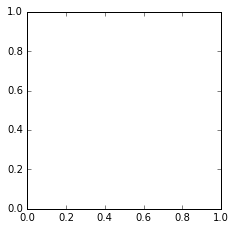

In [12]:
h = range(12,24)
h.extend(range(0,13))
plt.figure(figsize=(16, 12))
for m in months.keys():
    ax = plt.subplot(3, 4, m)
    ax.plot([np.sum(MMDC_grid[m][hr]) for hr in h])
    ax.set_xticks(range(0,25,4))
    ax.set_xticklabels([h[n] for n in range(0,25,4)])
    ax.set_ylim(10**1, 10**6)
    ax.semilogy()
    ax.set_xlim(0,24)
    ax.set_title(months[m])